# Heart Disease Prediction

## Goal
This project explores the UCI Heart Disease dataset to identify key risk factors and build a predictive model to determine whether a patient has heart disease based on clinical features.


In [2]:
# Imports
# !pip install ucimlrepo
# !pip install xgboost
# !pip install ydata-profiling

from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [3]:
# ML Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# ML Imports 2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
# ML Imports 3
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize


In [6]:
# numpy
import numpy as np

In [7]:
# in line plotting
%matplotlib inline


In [8]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [9]:
print(f"X.head(): {X.head()}")
print(f"y.head(): {y.head()}")



X.head():    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
y.head():    num
0    0
1    2
2    1
3    0
4    0


In [6]:
# EDA with Profiling using YData profiling
profile = ProfileReport(X.join(y), title="Heart Disease Profiling Report")
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]


In [11]:
# Data Cleaning and Preparation

# Combine features and target
df = X.join(y)

# Check for missing values
print(df.isnull().sum())

# Drop any rows with missing data
df = df.dropna()

# Use the actual target column name
target_col = 'num'

# Separate features and target
X = df.drop(columns=target_col)
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [25]:
# Debug
print(y.value_counts())



num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


In [12]:
# Models using Logistic Regression and Random Forest

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        36
           1       0.17      0.11      0.13         9
           2       0.50      0.20      0.29         5
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.32      0.28      0.29        60
weighted avg       0.56      0.62      0.58        60

Random Forest Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        36
           1       0.00      0.00      0.00         9
           2       0.33      0.20      0.25         5
           3       0.40      0.29      0.33         7
           4       0.00      0.00      0.00         3

    accuracy                           0.63        60
   macro avg       0.31      0.29      0.29        60
weighted avg       0.55    

In [13]:
# Combine minority classes to binary classification

# Recode y into binary labels
y_binary = y.apply(lambda x: 1 if x > 0 else 0)

# Redo your train/test split
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X, y_binary, test_size=0.2, random_state=42
)

# Scale again
scaler_bin = StandardScaler()
X_train_bin_scaled = scaler_bin.fit_transform(X_train_bin)
X_test_bin_scaled = scaler_bin.transform(X_test_bin)


In [14]:
# Retrain Models on Binary Target

# Logistic Regression
lr_bin = LogisticRegression(max_iter=1000)
lr_bin.fit(X_train_bin_scaled, y_train_bin)
y_pred_lr_bin = lr_bin.predict(X_test_bin_scaled)

print("Binary Logistic Regression Report:")
print(classification_report(y_test_bin, y_pred_lr_bin))

# Random Forest
rf_bin = RandomForestClassifier()
rf_bin.fit(X_train_bin, y_train_bin)
y_pred_rf_bin = rf_bin.predict(X_test_bin)

print("Binary Random Forest Report:")
print(classification_report(y_test_bin, y_pred_rf_bin))


Binary Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

Binary Random Forest Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



thalach     0.149124
chol        0.128630
oldpeak     0.115129
ca          0.110333
age         0.109196
trestbps    0.095571
thal        0.079325
cp          0.069016
exang       0.040284
slope       0.031363
sex         0.026648
restecg     0.026434
fbs         0.018946
dtype: float64


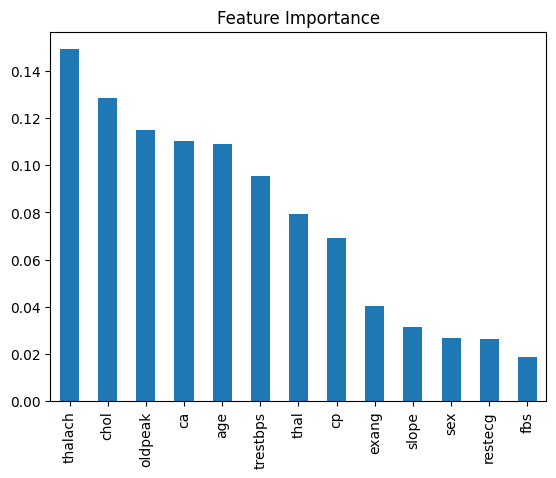

In [15]:
# Random Forest Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp)

# Optional: visualize
feat_imp.plot(kind='bar', title='Feature Importance')
plt.show()


In [34]:
# Error Analysis
cm = confusion_matrix(y_test_bin, y_pred_rf_bin)
print(cm)

[[32  4]
 [ 2 22]]


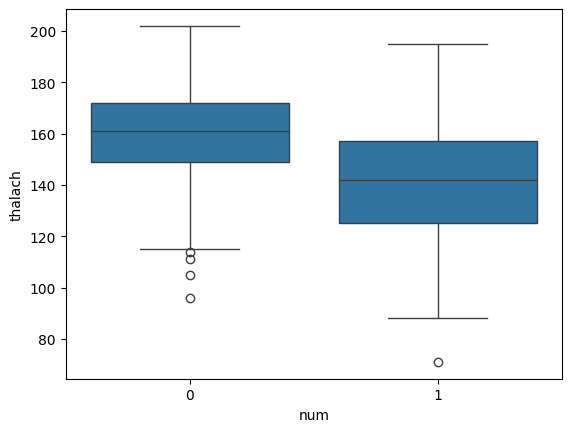

In [35]:
# EDA

sns.boxplot(x=y_binary, y=X['thalach'])
plt.show()

## More Visualizations

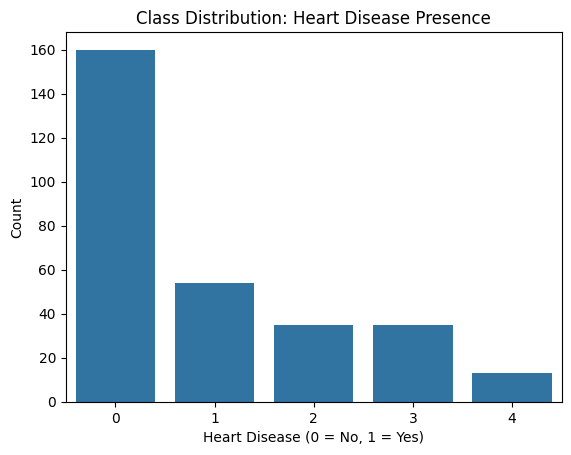

In [21]:
# Class distribution

sns.countplot(x=y)
plt.title("Class Distribution: Heart Disease Presence")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

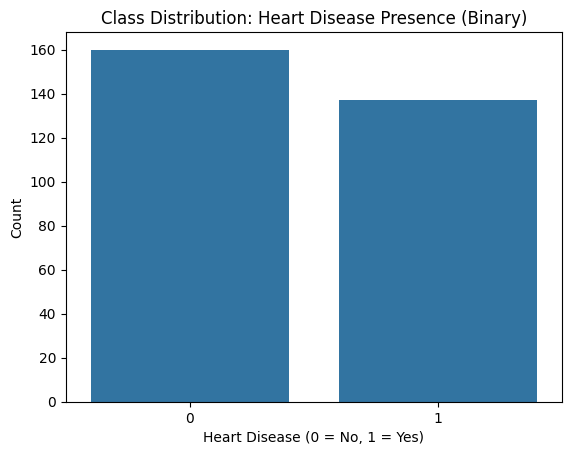

In [39]:

# Convert target to binary: 0 = no disease, 1 = has disease (combine 1, 2, 3, 4)
y_bin = y.copy()
y_bin = y_bin.apply(lambda x: 0 if x == 0 else 1)

# Plot the binary class distribution
sns.countplot(x=y_bin)
plt.title("Class Distribution: Heart Disease Presence (Binary)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

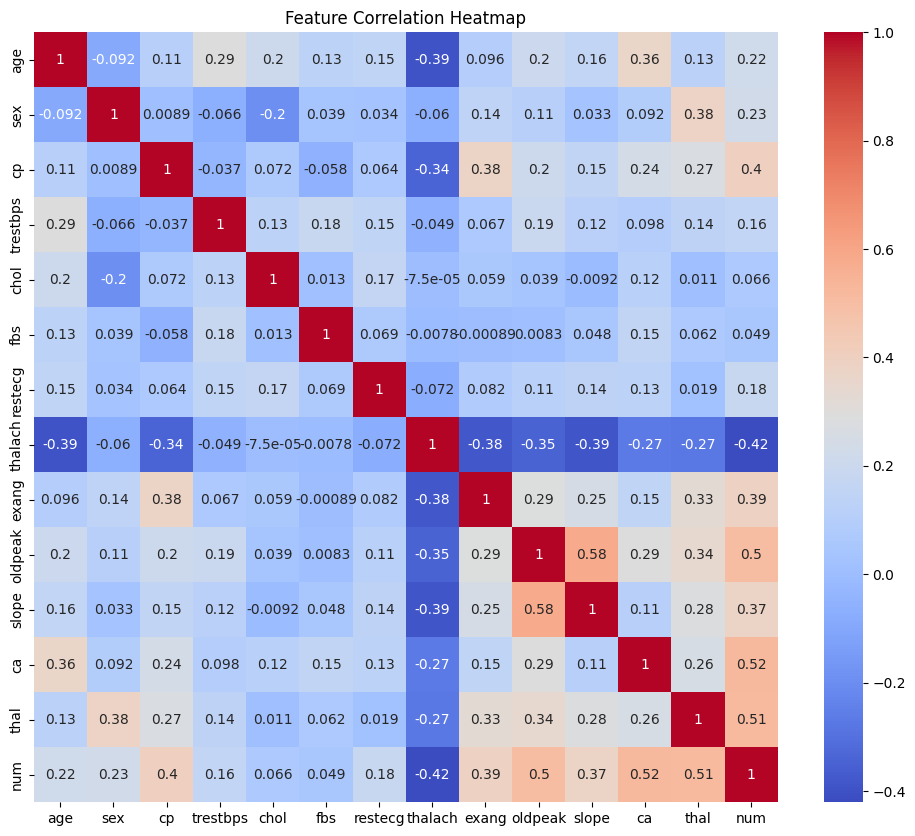

In [22]:
# Correlation Heat Map
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

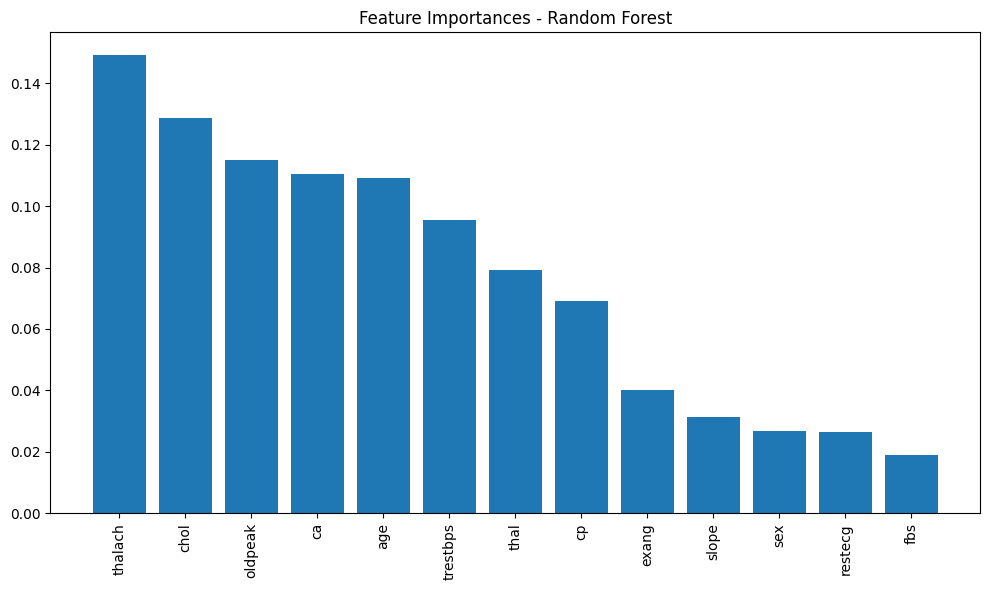

In [23]:
# Feature Importance: Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

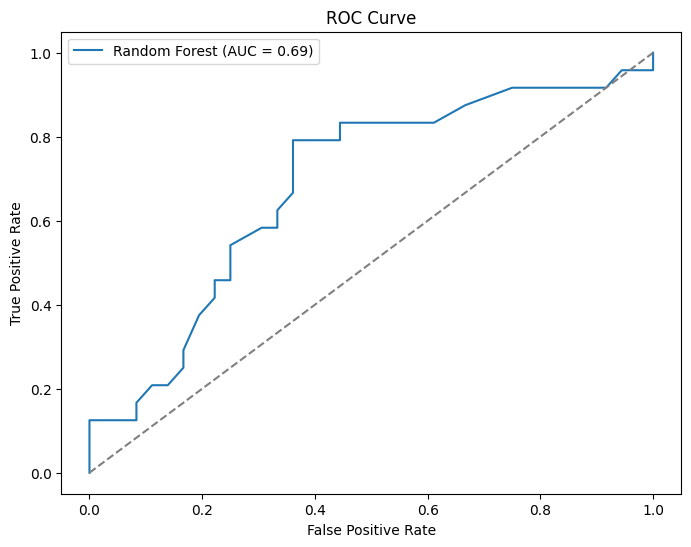

In [40]:
# ROC Curve (AUC Score)

# Ensure y_test is binary like y_train was
y_test_binary = y_test.apply(lambda x: 0 if x == 0 else 1)

# Predict probabilities for class 1 (has disease)
y_probs = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test_binary, y_probs)
auc_score = roc_auc_score(y_test_binary, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

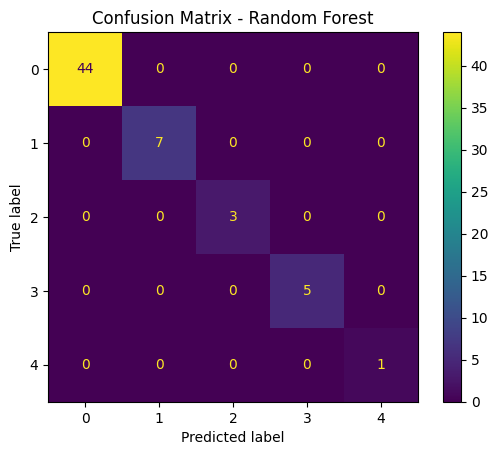

In [38]:
# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_pred_rf)
plt.title("Confusion Matrix - Random Forest")
plt.show()